##### Part of the "Data Mining and Neural Netwroks (B-KUL-G9X29A)" course offered by Ku Leuven and Prof. Dr. ir. Johan Suykens.

The simple implementation tackling this toy example presented here is extended directly into a fully fledged neural network, (can be found at this [link](https://github.com/Tryfonm/Projects/blob/master/NeuralNets/mynn.py)), and is trained on the MNIST dataset at this [link](https://github.com/Tryfonm/Projects/blob/master/NeuralNets/NeuralNet.ipynb).

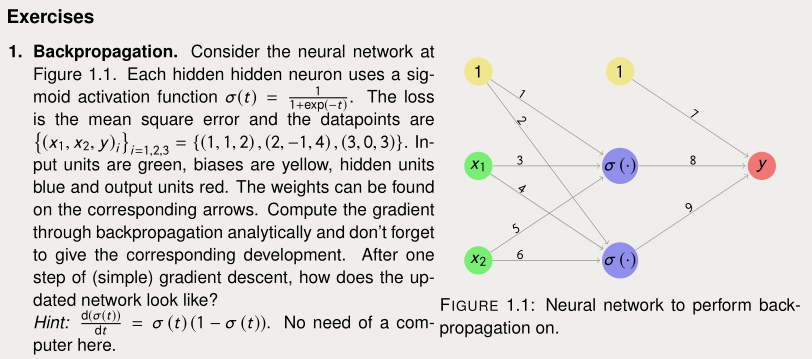

All that is needed to build a neural network from scratch is the following:

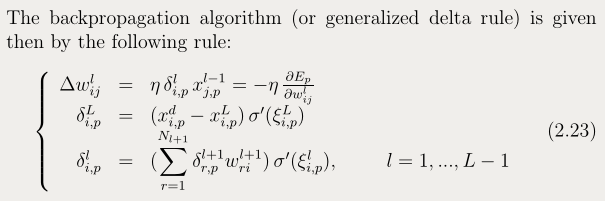

In [1]:
from time import sleep
import numpy as np

In [2]:
class NN():
    def __init__(self):
        self.x = {}
        self.weights = {}
        self.ksi = {}
        self.delta = {}
        self.Dweights = {}
        self.Dweights_avg = {}
        self.index = 0
        self.loss_accumulated = 0
 
         
        self.sigmoid = np.vectorize(self._sigmoid)
        self.dsigmoid = np.vectorize(self._dsigmoid)
        
        self.weights = {}
        self.weights[1] = np.array([[1,2],[3,4],[5,6]])
        self.weights[2] = np.array([[7],[8],[9]])
        
    def forward(self, input):
        
        self.batch_size  = input.shape[0]
        
        # Input layer
        self.x[0] = input
        self.x[0] = np.concatenate((np.ones((self.batch_size, 1)) , self.x[0]), axis=1) # Add the bias term

        ## Layer 1
        self.ksi[1] =  self.x[0] @ self.weights[1]
  
        self.x[1] = self.sigmoid(self.ksi[1]) #####
        self.x[1] = np.concatenate((np.ones((self.batch_size, 1)), self.x[1]), axis=1) # Add the bias term
        
        ## Output layer
        self.ksi[2] = self.x[1] @ self.weights[2]
        self.output = self.ksi[2]
        
        return self.output
    
    def backward(self, target):
        
        self.xd = target
        self.batch_size = self.xd.shape[0]
        
        # Layer 2: ## TODO --> Vectorize this loop over the batch
        self.delta[2] = (self.xd - self.output)
        temp = [] ###
        for i in range(self.batch_size ): 
            temp.append(np.outer(self.x[1][i], self.delta[2][i])) ###
        self.Dweights[2] = np.array(temp) ###
        
        # Layer 1: ## TODO --> Vectorize this loop over the batch
        temp = []
        for i in range(self.batch_size):
            temp.append(self.weights[2][1:,:] @ self.delta[2][i].T)
        self.delta[1] = np.array(temp) *  self.dsigmoid(model.ksi[1])
        temp = []
        for i in range(self.batch_size):
            temp.append(np.outer(self.x[0][i], self.delta[1][i]))
        self.Dweights[1] = np.array(temp)
    
    
    def step(self, lr=0.01):       
        
        self.Dweights_avg[1] = self.Dweights[1].mean(axis=0)
        self.Dweights_avg[2] = self.Dweights[2].mean(axis=0)      
        
        self.weights[1] = self.weights[1] + lr * self.Dweights_avg[1]
        self.weights[2] = self.weights[2] + lr * self.Dweights_avg[2]

        
    def _sigmoid(self, x):
        return 1 / (1+np.exp(-x))

    def _dsigmoid(self, x):
        return (self.sigmoid(x) * (1-self.sigmoid(x)))
    
    def print_analytic_derivation(self):
        print(f'\nGiven the input: {self.x[0].reshape(1,-1)} and target: {self.output.reshape(1,-1)}')
        print(f'\nDelta backpropagating from the last layer (1-neuron):\n -Neuron_1: {self.delta[2].item()}')
        print(f'\nDelta backpropagating from the 1st layer (2-neurons):\n -Neuron_1: {self.delta[1][0][0].item()}\n -Neuron_2: {self.delta[1][0][1]}')
        
        print(f"\nWeight's change for the first layer:")
        [print(x) for x in self.Dweights[2]]
        print(f"\nWeight's change for the second layer:")
        [print(x) for x in self.Dweights[1]]
        print()

In [3]:
model = NN()

--------------
### Feeding tha data points one by one

In [4]:
x_p1 = np.array([[1,1]])
x_p2 = np.array([[2,-1]])
x_p3 = np.array([[3,0]])

y_p1 = np.array([[2]])
y_p2 = np.array([[4]])
y_p3 = np.array([[3]])

In [5]:
for x, y  in zip((x_p1, x_p2, x_p3), (y_p1, y_p2, y_p3)):
    model.forward(x)
    model.backward(y)
    model.print_analytic_derivation()
    print('-----------------------')


Given the input: [[1. 1. 1.]] and target: [[23.99895755]]

Delta backpropagating from the last layer (1-neuron):
 -Neuron_1: -21.998957545820687

Delta backpropagating from the 1st layer (2-neurons):
 -Neuron_1: -0.021713736620077296
 -Neuron_2: -0.0012164814517322468

Weight's change for the first layer:
[[-21.99895755]
 [-21.99624299]
 [-21.99882238]]

Weight's change for the second layer:
[[-0.02171374 -0.00121648]
 [-0.02171374 -0.00121648]
 [-0.02171374 -0.00121648]]

-----------------------

Given the input: [[ 1.  2. -1.]] and target: [[22.88450073]]

Delta backpropagating from the last layer (1-neuron):
 -Neuron_1: -18.884500734164234

Delta backpropagating from the 1st layer (2-neurons):
 -Neuron_1: -15.862011525080447
 -Neuron_2: -3.001962496070008

Weight's change for the first layer:
[[-18.88450073]
 [-16.63341307]
 [-18.54484014]]

Weight's change for the second layer:
[[-15.86201153  -3.0019625 ]
 [-31.72402305  -6.00392499]
 [ 15.86201153   3.0019625 ]]

---------------

-----------------
### Feeding all three data points as a batch

In [6]:
x_train_as_batch = np.array([
    [1,1],
    [2,-1],
    [3,0]
])
y_train_as_batch = np.array([
    [2],
    [4],
    [3]
])

In [7]:
model.forward(x_train_as_batch)

array([[23.99895755],
       [22.88450073],
       [23.99962933]])

In [8]:
model.backward(y_train_as_batch)
model.step()

##### The averaged-out over the batch Weight's change 

In [9]:
print(f'1st layer:\n{model.Dweights_avg[1]}\n\n2nd layer:\n{model.Dweights_avg[2]}')

1st layer:
[[ -5.29711721  -1.00111204]
 [-10.58953862  -2.00187098]
 [  5.28009926   1.00024867]]

2nd layer:
[[-20.62769587]
 [-19.87611068]
 [-20.5144248 ]]
